In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [20]:
########
# In order to test new feature 
# you need to change only this functions
########
get_features = thesisTfIdfNgramFeatures.create_5_gram
get_zwickau_features = thesisTfIdfNgramFeatures.create_zwickau_5_gram
get_london_feature = thesisTfIdfNgramFeatures.create_london_5_gram

In [21]:
thesisDataReader.read_zwickau().replace(".", "\n")

zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(thesisDataReader.read_zwickau().replace(".", "\n")))
london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(thesisDataReader.read_london().replace(".", "\n")))

zwickau_corpus = list(filter(None, zwickau_corpus))
london_corpus = list(filter(None, london_corpus))

In [22]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [23]:
zwickau_df = thesisTfIdfNgramFeatures.create_5_gram(zwickau_corpus)
zwickau_similarities = cosine_similarity(zwickau_df, zwickau_df)

In [25]:
london_df = thesisTfIdfNgramFeatures.create_5_gram(london_corpus)
london_similarities = cosine_similarity(london_df, london_df)

,000,1 ad,1 co,1 de,1 di,1 es,1 in,1 le,1 mi,1 re,...,zotus,zrael,zrahe,zucar,zucca,zurio,zyda,zyph,½ mil,½ teu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def get_max_similarity_per_p(similarities):
    res = []
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        max_similarity = value[max_indices_without_self[-1]]
        res.append(max_similarity)
    return res

In [30]:
zwickau_max_similarity_per_p = get_max_similarity_per_p(zwickau_similarities)
london_max_similarity_per_p = get_max_similarity_per_p(london_similarities)


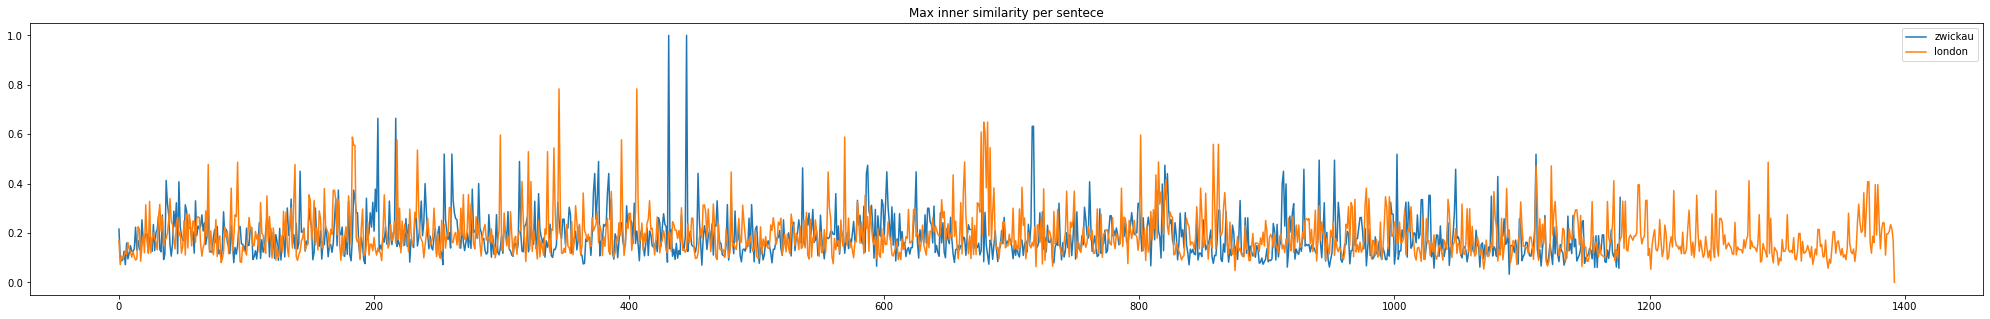

In [33]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(35, 5))
ax.plot(zwickau_max_similarity_per_p, label="zwickau")
ax.plot(london_max_similarity_per_p, label="london")
ax.legend()
plt.title('Max inner similarity per sentece')
plt.show()

In [34]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    res = []
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        res.append(temp_similarities[0])
    return res

In [ ]:
zwickau_london_similarities = cross_version_similarity(zwickau_corpus, london_corpus)
london_zwickau_similarities = cross_version_similarity(london_corpus, zwickau_corpus)

In [ ]:
show_similarities_data(zwickau_london_similarities)

In [ ]:
show_similarities_data(london_zwickau_similarities)